##2.2 Implementation of a simple perceptron
####define class

In [5]:
import numpy as np
#perceptron classifier
class Perceptron(object):
    #parameter
    #学習率(0<eta<1)
    eta: float
    #訓練データの訓練回数
    n_iter: int 
    #重み初期化の為の乱数シード
    random_state: int
    
    #属性
    #適合後の重み
    # w_: 1次元配列
    #各エポックでの誤分類(更新）の数
    errors_:list
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,x,y):
        #parameter
        # x: {配列のようなデータ構造}, shape=[n_examples,n_features]訓練データ
        # y:shape=[n_examples]目的関数
        #戻り値
        self:object
        rng = np.random.RandomState(self.random_state)
        self.w_=rng.normal(loc=0.0,scale=0.01,size=1+x.shape[1])
        self.errors_=[]
        for _ in range (self.n_iter):
            errors=0
            for xi,target in zip(x,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update!=0)
            #反復ごとの誤差を格納
            self.errors_.append(errors)
        return self
    def net_input(self,x):
        return np.dot(x,self.w_[1:])+self.w_[0]
    def predict(self,x):
        #1step後のクラスラベルを返す
        return np.where(self.net_input(x)>=0,1,-1)

#### Iris data set を使ってみる

In [6]:
import os
import pandas as pd
s=os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
print('URL:',s)
df=pd.read_csv(s,header=None,encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


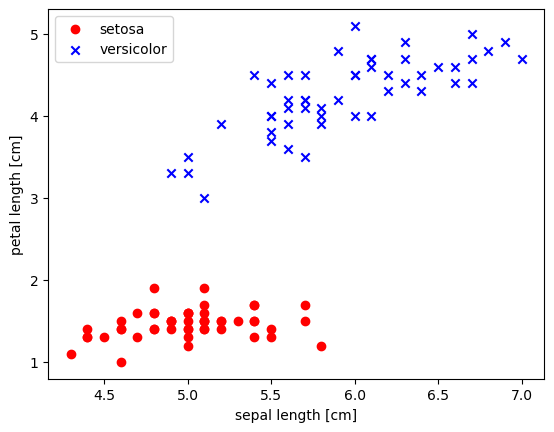

In [7]:
import matplotlib.pyplot as plt
#1-100行目の目的変数の抽出
y=df.iloc[0:100,4].values
#iris-setosaを-1,iris_vetsicolorを1に変換
y=np.where(y=='Iris-setosa',-1,1)
#1-100rowの1,3columの抽出
x=df.iloc[0:100,[0,2]].values
#品種setosaのプロット
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
#品種versicolorのプロット
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')
#軸のラベル設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#凡例の設定（左上）
plt.legend(loc='upper left')
#図の表示
plt.show()


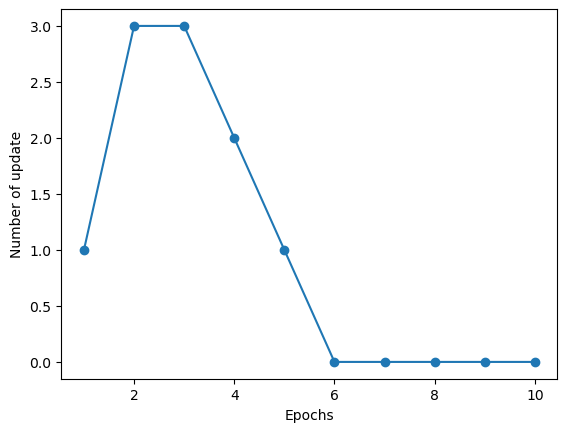

In [8]:
#perceptronのobjectの生成(インスタンス化)
ppn=Perceptron(eta=0.1,n_iter=10)
#訓練データへのモデルの適合
ppn.fit(x,y)
#epochと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
#軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
#図の表示
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x,y,classifier,resolution=0.02):
    